# システム信頼性の評価　2025



このノートブックでは、システム信頼性の評価において一般的に用いられる「バスタブ曲線」について説明します。 バスタブ曲線は、製品やシステムのライフサイクルにおける故障率を表すグラフです。この曲線は、以下の3つの主要なフェーズから成り立っています。

    DFR（Decreasing Failure Rate：減少故障率） - 初期故障期または乳児死亡期。この期間では、製品は初期不良や製造上の問題により高い故障率を示すことが多いです。時間が経つにつれて、故障率は減少します。

    CFR（Constant Failure Rate：一定故障率） - 偶発故障期。この期間では、故障率は一定となります。製品は設計通りの性能を発揮し、ランダムな故障が発生する可能性があります。

    IFR（Increasing Failure Rate：増加故障率） - 摩耗故障期または疲労故障期。この期間では、製品の寿命が近づくにつれて故障率が増加します。

これらのフェーズを組み合わせることで、バスタブ曲線が形成されます。


## バスタブ曲線について
- Version 1より機能を追加しています

In [8]:
# セル 1: インポート
import numpy as np
import matplotlib.pyplot as plt

# Weibull distribution hazard function
def weibull(m, lambda_, t):
    return (m / lambda_) * (t / lambda_)**(m - 1) * np.exp(- (t / lambda_)**m)


In [9]:
# セル 2: パラメータ入力
lifetime = float(input("Enter expected lifetime (years): "))
num_units = int(input("Enter number of units produced: "))
defect_rate_input = input("Enter initial defect rate (0-1, optional; Enter for 0): ")
defect_rate = float(defect_rate_input) if defect_rate_input else 0.0

print(f"\n[Inputs] Lifetime: {lifetime} years, Units: {num_units}, Defect rate: {defect_rate}")


Enter expected lifetime (years):  15
Enter number of units produced:  200
Enter initial defect rate (0-1, optional; Enter for 0):  1.0



[Inputs] Lifetime: 15.0 years, Units: 200, Defect rate: 1.0


In [10]:
# セル 3: 時間軸とパラメータ定義
# time: from 0.1 to lifetime*2
time = np.linspace(0.1, lifetime * 2, 1000)
time_normal_dominant = lifetime

m_initial_wearout = 0.5  # shape for infant/wear-out
m_normal = 1.0           # shape for constant-failure phase
lambda_initial_wearout = lifetime


In [11]:
# セル 4: フェーズごとの failure rate 計算
failure_rate_initial = weibull(m_initial_wearout, lambda_initial_wearout, time)
failure_rate_wearout = weibull(m_initial_wearout, lambda_initial_wearout, (lifetime * 2) - time)
lambda_normal = weibull(m_initial_wearout, lambda_initial_wearout, time_normal_dominant)
failure_rate_normal = np.full_like(time, lambda_normal)


/tmp/ipykernel_153295/1002832332.py:7: RuntimeWarning: divide by zero encountered in power
  return (m / lambda_) * (t / lambda_)**(m - 1) * np.exp(- (t / lambda_)**m)


In [12]:
# セル 5: 合成バスタブ曲線と期待故障数
w_dfr, w_cfr, w_ifr = 0.3, 0.4, 0.3
failure_rate_combined = w_dfr * failure_rate_initial + w_cfr * failure_rate_normal + w_ifr * failure_rate_wearout
expected_failures = failure_rate_combined * num_units


posx and posy should be finite values
posx and posy should be finite values


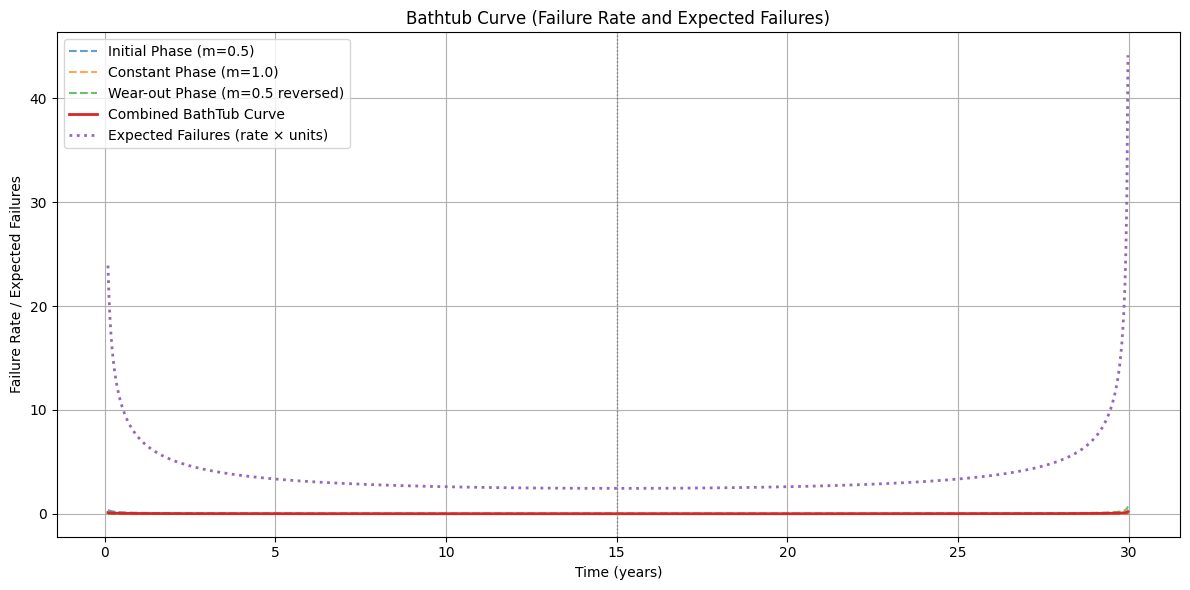

In [13]:
# セル 6: バスタブ曲線プロット
plt.figure(figsize=(12, 6))
plt.plot(time, failure_rate_initial, '--', label='Initial Phase (m=0.5)', alpha=0.7)
plt.plot(time, failure_rate_normal, '--', label='Constant Phase (m=1.0)', alpha=0.7)
plt.plot(time, failure_rate_wearout, '--', label='Wear-out Phase (m=0.5 reversed)', alpha=0.7)
plt.plot(time, failure_rate_combined, '-', linewidth=2, label='Combined BathTub Curve')
plt.plot(time, expected_failures, ':', linewidth=2, label='Expected Failures (rate × units)')
plt.axvline(lifetime, color='gray', linestyle=':', linewidth=1)
plt.text(lifetime, max(failure_rate_combined)*0.9, 'Lifetime', rotation=90, va='top', ha='right')
plt.title('Bathtub Curve (Failure Rate and Expected Failures)')
plt.xlabel('Time (years)')
plt.ylabel('Failure Rate / Expected Failures')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


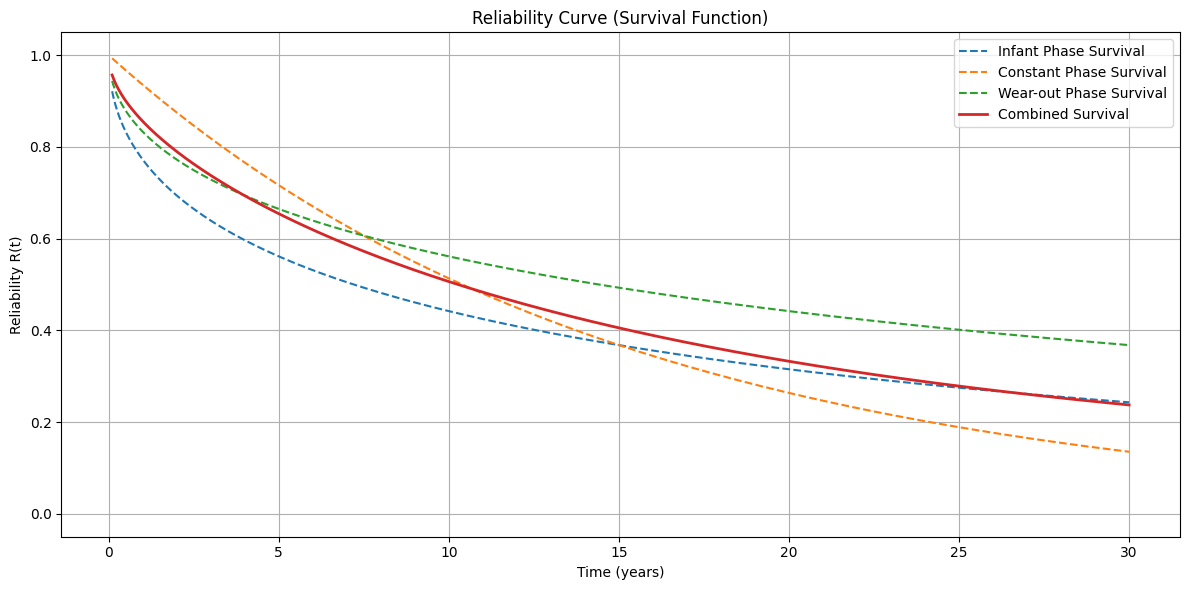

In [14]:
# セル 7: 信頼性曲線 (Survival Function) のプロット
def reliability_weibull(t, m, lambda_):
    return np.exp(- (t / lambda_)**m)

R_initial = reliability_weibull(time, m_initial_wearout, lambda_initial_wearout)
R_normal = reliability_weibull(time, m_normal, lambda_initial_wearout)
R_wearout = reliability_weibull(time, m_initial_wearout, lambda_initial_wearout * 2)  # 例示用

# 合成生存関数 (単純加重平均)
R_combined = w_dfr * R_initial + w_cfr * R_normal + w_ifr * R_wearout

plt.figure(figsize=(12, 6))
plt.plot(time, R_initial, '--', label='Infant Phase Survival')
plt.plot(time, R_normal, '--', label='Constant Phase Survival')
plt.plot(time, R_wearout, '--', label='Wear-out Phase Survival')
plt.plot(time, R_combined, '-', linewidth=2, label='Combined Survival')
plt.title('Reliability Curve (Survival Function)')
plt.xlabel('Time (years)')
plt.ylabel('Reliability R(t)')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
